# Tutorial de solución de ecuaciones diferenciales ordinarias con parámetros constantes
### Lourdes Martín Aguilar, César Flores López & Marco Herrera Valdez  
#### Facultad de Ciencias, Universidad Nacional Autónoma de México

Resolvamos un problema con valor inicial para una variable $x$ que depende de $t$

\begin{equation}
\partial_t x = \frac{a - x}{\tau}, \quad x(t_0) = 0, \quad (1)
\end{equation}

Utilizando las rutinas de integración numérica del módulo _scipy_ de _Python_

## Solución analítica

La solución de la ecuación (1) se puede obtener analíticamente separando variables e integrando en el intervalo [0,t]:

La solución analítica es de la forma

\begin{equation} 
x(t) = a - \left( a - x_0\right) \exp \left(-\frac{t}{\tau} \right)
\end{equation}

Compararemos $x(t)$ con la solución numérica $u(t)$ obtenida con _python_

Primero importemos los módulos necesarios

In [1]:
import scipy as sc
import matplotlib.pylab as gr 
from scipy.integrate import odeint 
%matplotlib inline 

El módulo scipy tiene herramientas para hacer cálculos numéricos, el módulo pylab de matplotlib contiene herramientas para graficar arreglos, listas y otros objetos de Python. El comando matplotlib inline instruye al kernel de Jupyter (o ipython notebook) para que muestre las figuras dentro del documento.

Definamos una función para que _Python_ la integre numéricamente

In [2]:
def linearEq(u,t,p): 
    du = (p["a"]-u)/p["tau"]
    return du 



¿Por qué así y no de otra forma? Por ejemplo:

In [3]:
def linearEq2(u,t,a,b): 
    du = (a-u)/b
    return du 

Este modo de escribir la ecuación no nos permite variar los valores de los parámetros si así lo quisiéramos.



Generemos un diccionario con los parámetros y arreglos necesarios para integrar la ecuación numéricamente. 

In [4]:
p=dict() 
p["a"]=90.0; p["tau"]=45.0; p["ic"]=200.0
p["timeMax"]=200; p["timeStep"]=0.1
p["sampTimes"]= sc.arange(0,p["timeMax"],p["timeStep"])
print(p.keys())


dict_keys(['timeStep', 'sampTimes', 'ic', 'timeMax', 'a', 'tau'])


Ahora iteremos la función usando la función _integrate.odeint_ de _scipy_

In [5]:
# Sintaxis:
# solucion = odeint(func, y0, t, args)
uSol= odeint(func=linearEq, y0=p["ic"], t=p["sampTimes"], args=(p,)).transpose()

Explicar la sintaxis de la función odeint, y la forma de la salida de la función. De ahí, explicar la transposición.

In [6]:
print(uSol[0][0:10])

[ 200.          199.75582679  199.51219561  199.2691053   199.02655453
  198.7845426   198.54306816  198.30212993  198.06172665  197.82185704]


Definamos otra función para comparar la solución analítica $x(t)$ con la solución numérica $u(t)$.

In [7]:
def x(t,p):
    return p["a"] - (p["a"]-p["ic"])*sc.exp(-t/p["tau"])

Otra manera de definir la función $x$ sería

In [8]:
x= lambda t,p: p["a"] - (p["a"]-p["ic"])*sc.exp(-t/p["tau"])

Como el paso de integración es 0.1, el décimo valor de la solución numérica se puede comparar con el valor de la función $x$ en el tiempo $t=1$.

In [9]:
print(x(1,p))

197.582515973


Graficamos la solución analítica $x(t)$ y comparamos contra la solución numérica $u(t)$ y un acercamiento

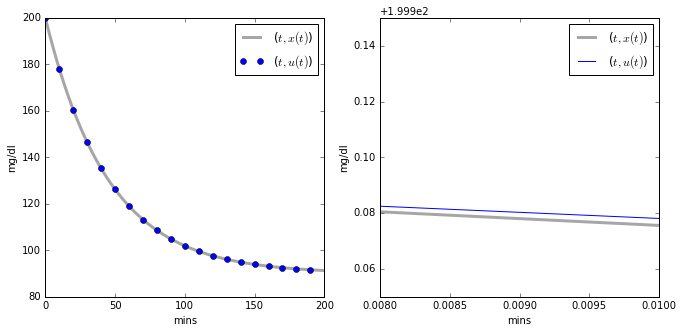

In [10]:
tt = sc.arange(0,p["timeMax"],p["timeStep"]*100)
fig=gr.figure(figsize=(11,5))
rows=1; cols=2
ax1=fig.add_subplot(rows,cols,1) 
ax2=fig.add_subplot(rows,cols,2)
ax1.plot(p["sampTimes"], uSol[0],'k',lw=3, alpha=0.35, label=r'($t,x(t)$)') 
ax1.plot(tt,x(tt,p),'bo',label=r'($t,u(t)$)')  
ax2.plot(p["sampTimes"], uSol[0],'k',lw=3, alpha=0.35, label=r'($t,x(t)$)') 
ax2.plot(tt,x(tt,p),'b',label=r'($t,u(t)$)')  
ax2.set_xlim(0.008,0.01); ax2.set_ylim(199.95,200.05)
ax2.set_xlabel("mins")
ax1.set_xlabel("mins")
ax2.set_ylabel("mg/dl")
ax1.set_ylabel("mg/dl")
ax1.legend(); ax2.legend()